In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# ==========================
# PATHS
# ==========================
BASE_PATH = r"C:\Users\Noureen\OneDrive\Documents\DL\Vision-Based-Driver-Fatigue-Monitoring-and-Alert-System\DATA\archive\Driver Drowsiness Dataset (DDD)"

INPUT_PATH = os.path.join(BASE_PATH, "DATA_SPLIT")
OUTPUT_PATH = os.path.join(BASE_PATH, "DATA_PREPROCESSED")

IMG_SIZE = 224
classes = ["Drowsy", "Non Drowsy"]
splits = ["train", "val", "test"]

# ==========================
# CREATE OUTPUT FOLDERS
# ==========================
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(OUTPUT_PATH, split, cls), exist_ok=True)

# ==========================
# PREPROCESS FUNCTION
# ==========================
def preprocess_and_save(input_dir, output_dir):
    for split in splits:
        for cls in classes:
            in_folder = os.path.join(input_dir, split, cls)
            out_folder = os.path.join(output_dir, split, cls)

            images = os.listdir(in_folder)

            for img_name in tqdm(images, desc=f"{split}/{cls}"):
                img_path = os.path.join(in_folder, img_name)
                img = cv2.imread(img_path)

                if img is None:
                    continue

                # Resize
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                # BGR → RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Normalize
                img = img / 255.0

                # Back to uint8
                img = (img * 255).astype(np.uint8)

                # ✅ FIX: RGB → BGR before saving
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                cv2.imwrite(os.path.join(out_folder, img_name), img)


# ==========================
# RUN PREPROCESSING
# ==========================
preprocess_and_save(INPUT_PATH, OUTPUT_PATH)

print("✅ Preprocessing complete and dataset saved!")


test/Non Drowsy: 100%|██████████| 2918/2918 [00:43<00:00, 66.36it/s]

✅ Preprocessing complete and dataset saved!


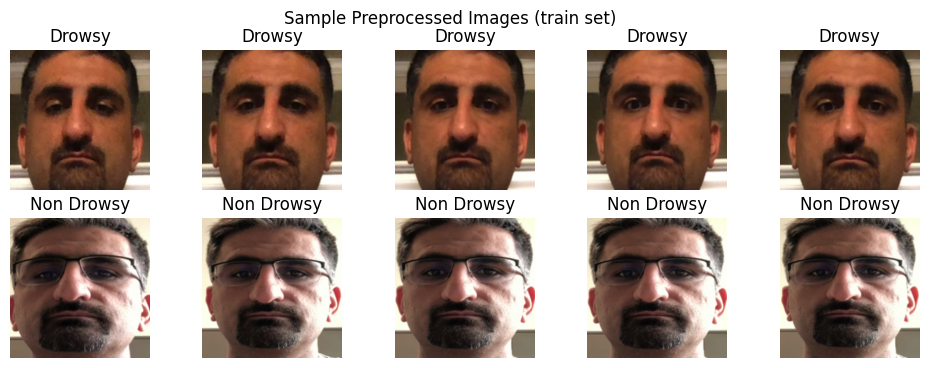

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

PREPROCESSED_PATH = r"C:\Users\Noureen\OneDrive\Documents\DL\Vision-Based-Driver-Fatigue-Monitoring-and-Alert-System\DATA\archive\Driver Drowsiness Dataset (DDD)\DATA_PREPROCESSED"

def show_preprocessed_images(base_path, split="train", n=5):
    classes = ["Drowsy", "Non Drowsy"]
    plt.figure(figsize=(12, 4))
    idx = 1

    for cls in classes:
        cls_path = os.path.join(base_path, split, cls)
        images = os.listdir(cls_path)[:n]

        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(classes), n, idx)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
            idx += 1

    plt.suptitle(f"Sample Preprocessed Images ({split} set)")
    plt.show()

show_preprocessed_images(PREPROCESSED_PATH, split="train", n=5)
                                                                                         